In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
postcodes_missing = pd.read_csv('/Users/dm1223/Desktop/ads-deluge-jubilee/flood_tool/example_data/postcodes_missing_data.csv')
postcodes_unlabelled = pd.read_csv('/Users/dm1223/Desktop/ads-deluge-jubilee/flood_tool/example_data/postcodes_unlabelled.csv')
typical_day = pd.read_csv('/Users/dm1223/Desktop/ads-deluge-jubilee/flood_tool/example_data/typical_day.csv')
wet_day = pd.read_csv('/Users/dm1223/Desktop/ads-deluge-jubilee/flood_tool/example_data/wet_day.csv')

In [198]:
district_data = pd.read_csv('/Users/dm1223/Desktop/ads-deluge-jubilee/flood_tool/resources/district_data.csv')
postocodes_labelled = pd.read_csv('/Users/dm1223/Desktop/ads-deluge-jubilee/flood_tool/resources/postcodes_labelled.csv')
sector_data = pd.read_csv('/Users/dm1223/Desktop/ads-deluge-jubilee/flood_tool/resources/sector_data.csv')
stations = pd.read_csv('/Users/dm1223/Desktop/ads-deluge-jubilee/flood_tool/resources/stations.csv')

In [ ]:
postocodes_labelled.head()

,postcode,easting,northing,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority
0,PO9 5EA,472101,108419,Unsurveyed/Urban,40,NaN,1530.0,Havant
1,EX15 3XE,313905,113519,Luvisols,130,River Culm,310.0,Mid Devon
2,PO14 4RJ,452325,106646,Unsurveyed/Urban,40,NaN,1270.0,Fareham
3,SE24 9UX,532008,174437,Unsurveyed/Urban,20,River Thames,5290.0,Lambeth
4,BS20 9PR,346765,176083,Unsurveyed/Urban,10,NaN,640.0,North Somerset


In [200]:
print('Missing for postcodes_labelled', postocodes_labelled.isnull().sum()) # nearestWatercourse = 30091, medianPrice = 6202
print('Missing for postcodes_missing', postcodes_missing.isnull().sum())
print('Missing for postcodes_labelled', postocodes_labelled.isnull().sum())
print('Missing for typical_day', typical_day.isnull().sum())
print('Missing for wet_day', wet_day.isnull().sum())

Missing for postcodes_labelled postcode                     0
easting                      0
northing                     0
soilType                     0
elevation                    0
nearestWatercourse       30091
distanceToWatercourse        0
localAuthority               0
riskLabel                    0
medianPrice               6202
historicallyFlooded          0
dtype: int64
Missing for postcodes_missing postcode                   0
easting                    0
northing                   0
soilType                 321
elevation                327
nearestWatercourse       562
distanceToWatercourse    331
localAuthority           317
dtype: int64
Missing for postcodes_labelled postcode                     0
easting                      0
northing                     0
soilType                     0
elevation                    0
nearestWatercourse       30091
distanceToWatercourse        0
localAuthority               0
riskLabel                    0
medianPrice               6202

In [ ]:
postcodes_unlabelled.head()

In [202]:
print('Missing for postcodes_labelled', postocodes_labelled.shape, postocodes_labelled.isnull().sum())

Missing for postcodes_labelled (80000, 11) postcode                     0
easting                      0
northing                     0
soilType                     0
elevation                    0
nearestWatercourse       30091
distanceToWatercourse        0
localAuthority               0
riskLabel                    0
medianPrice               6202
historicallyFlooded          0
dtype: int64


In [ ]:
from flood_tool.geo import get_gps_lat_long_from_easting_northing
coordinates_lat = get_gps_lat_long_from_easting_northing(postocodes_labelled['easting'], postocodes_labelled['northing'])
coordinates_df = pd.DataFrame({
    'Latitude': coordinates_lat[0],
    'Longitude': coordinates_lat[1]
})
postocodes_labelled = pd.concat([postocodes_labelled, coordinates_df], axis=1)
postocodes_labelled.drop(columns=['easting', 'northing'], inplace=True)
postocodes_labelled.head()

1. task 1: postocodes_labelled.shape: predict risk flood, want to have high recall. 

In [ ]:
postocodes_labelled.head()



,postcode,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded,Latitude,Longitude
0,BA1 1AL,Unsurveyed/Urban,20,River Avon,1240.0,Bath and North East Somerset,5,621800.0,1,51.379625,-2.363284
1,BA1 1AN,Unsurveyed/Urban,20,River Avon,1550.0,Bath and North East Somerset,3,577900.0,0,51.379000,-2.358926
2,BA1 1AR,Unsurveyed/Urban,20,River Avon,1540.0,Bath and North East Somerset,5,533300.0,1,51.378585,-2.359282
3,BA1 1BG,Unsurveyed/Urban,30,River Avon,1450.0,Bath and North East Somerset,1,563600.0,0,51.383215,-2.359763
4,BA1 1BH,Unsurveyed/Urban,30,River Avon,1410.0,Bath and North East Somerset,1,570800.0,0,51.382862,-2.360321


Task 2: predict house pricees

In [ ]:
postocodes_labelled.head()

6202

<Axes: >

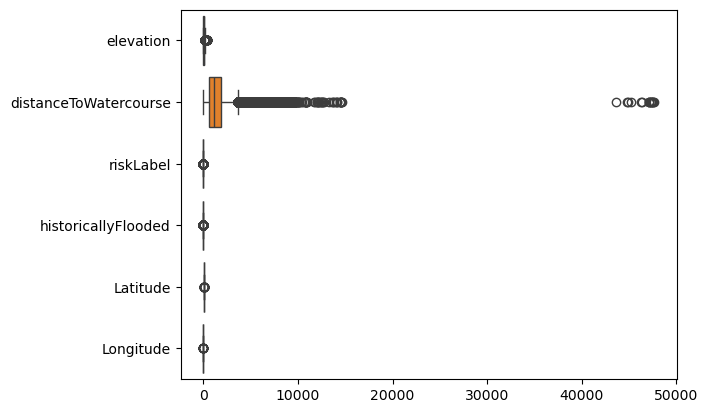

In [207]:
sns.boxplot(postocodes_labelled.drop(columns='medianPrice'), orient='h' )

elevation, robust scaler, distance to watercourse robust scaler, log on median and distance to Watercourse. 

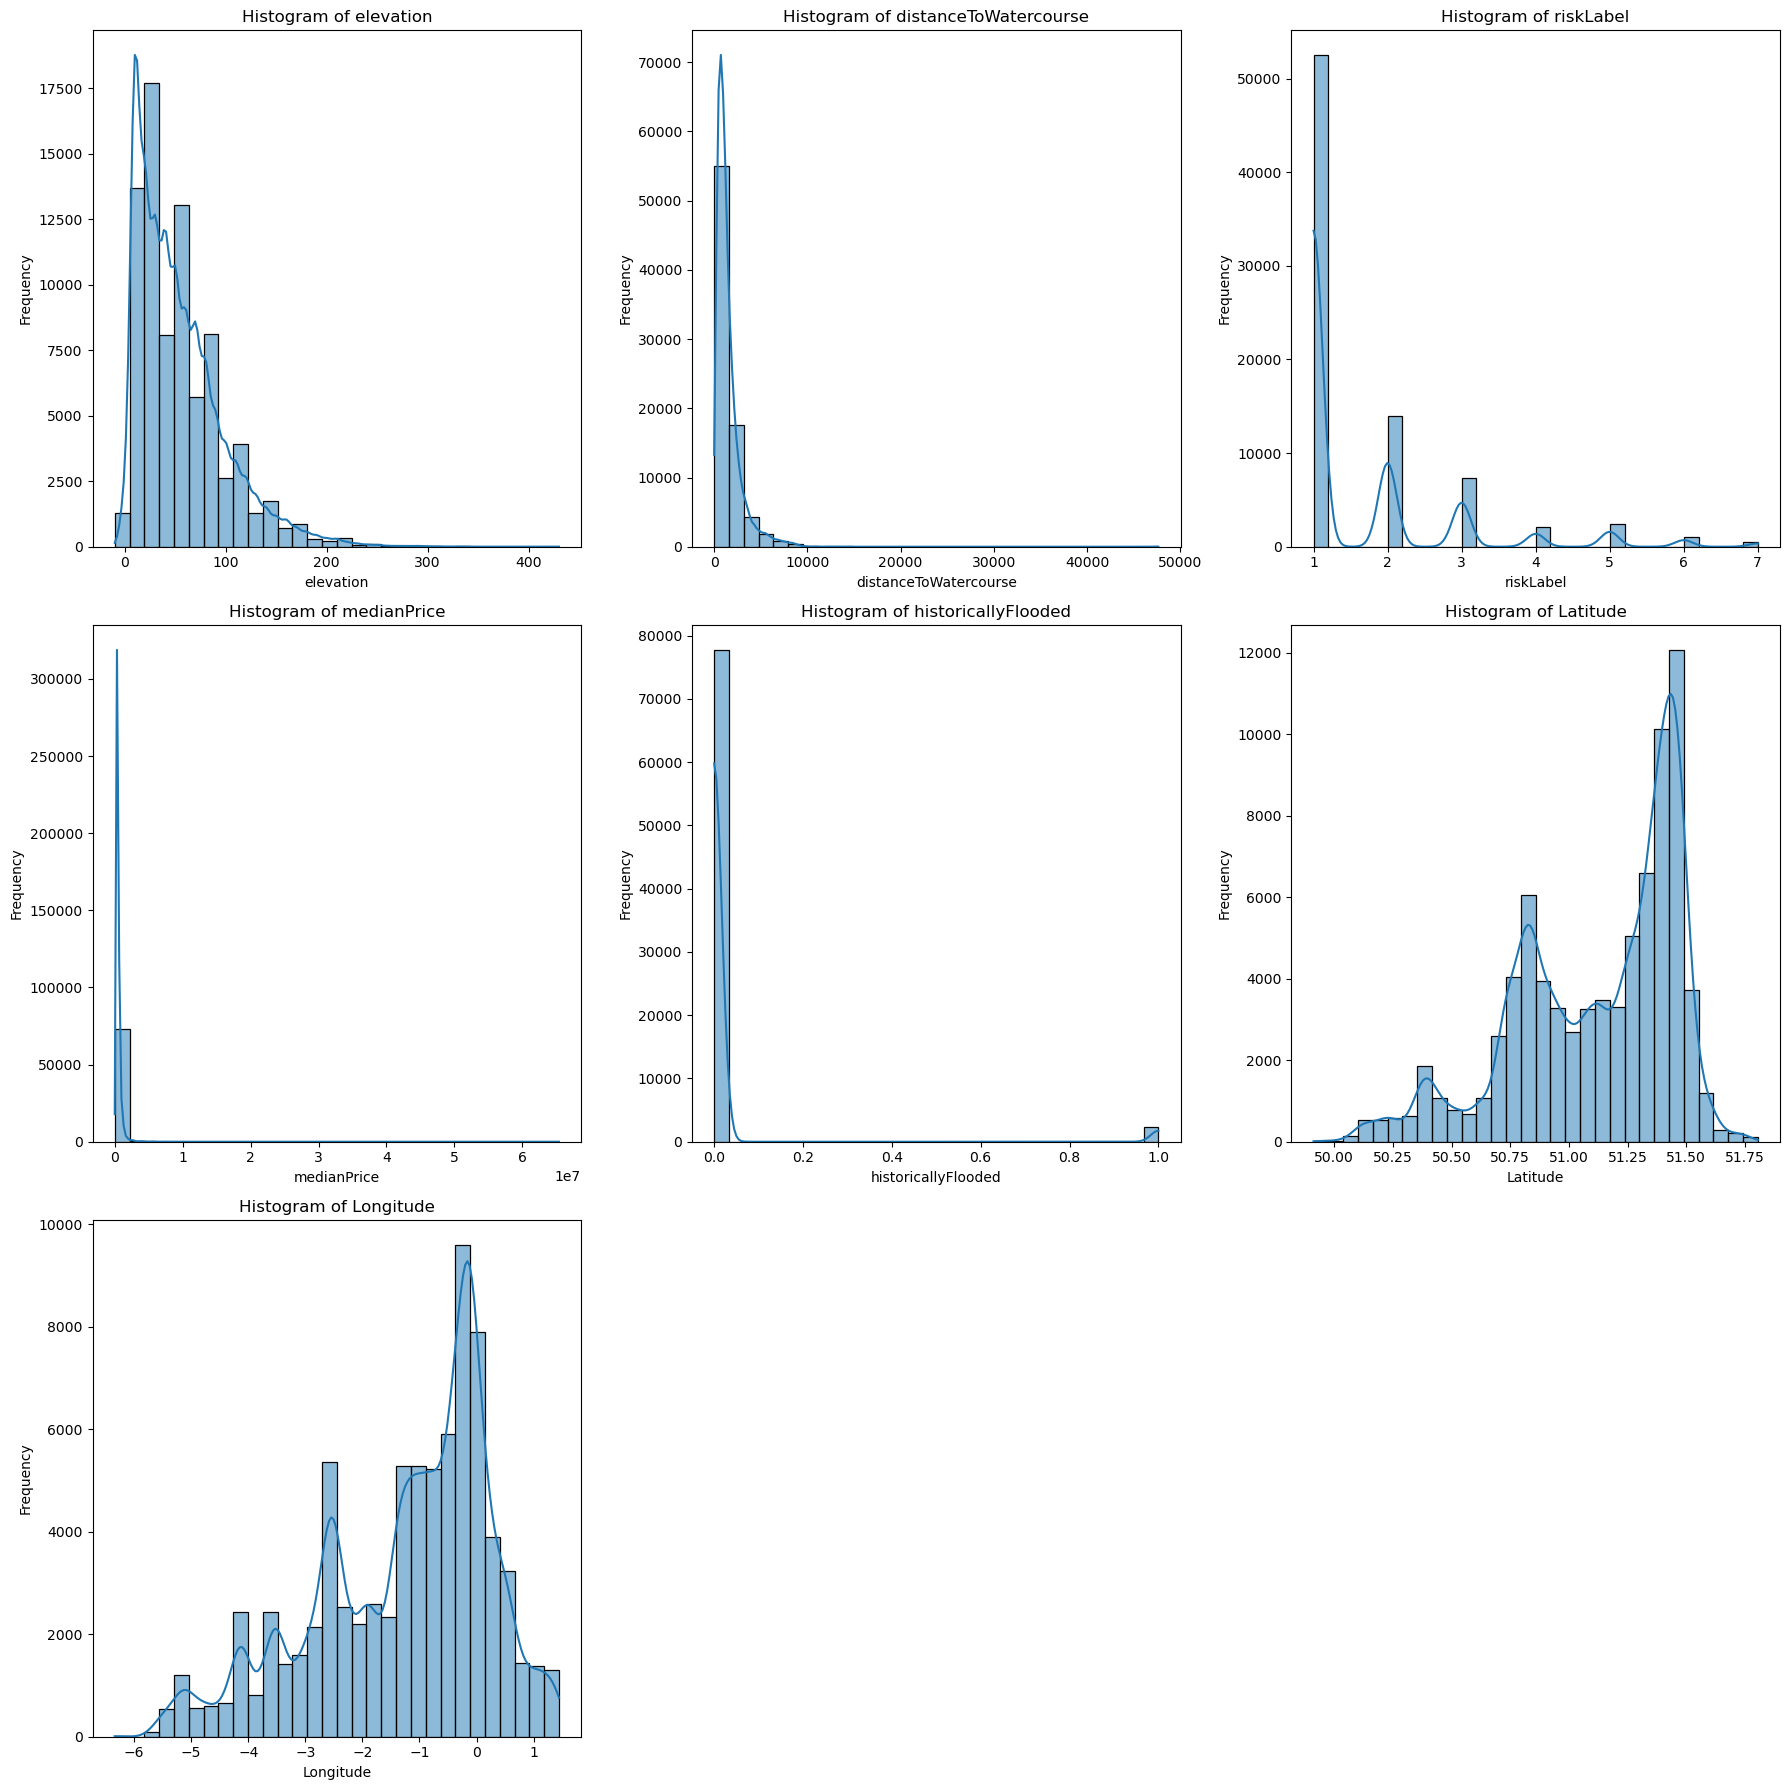

In [208]:
def plot_all_histograms(df, bins=30):
    """
    Plots a histogram for each numeric column in the DataFrame in a grid layout.
    
    Parameters:
    - df: pandas DataFrame with data.
    - bins: int, the number of bins for the histograms.
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_cols = len(numeric_cols)
    num_rows = (num_cols + 2) // 3  # Adjust the number of rows based on the number of columns

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], bins=bins, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_all_histograms(postocodes_labelled)


#elevation, distacnetoWaterscourse skwewed: robust scaler
#

<Axes: xlabel='medianPrice'>

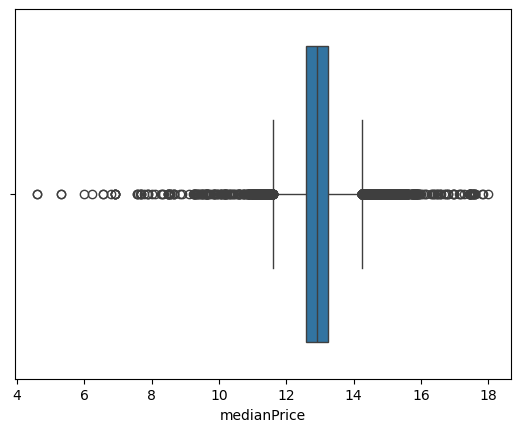

In [209]:
sns.boxplot(np.log(postocodes_labelled['medianPrice']), orient='h')
#4to 11.9, 11.9 to 14.2, 14.2 inf because we want to be rich.


In [ ]:
# Create bins for log-transformed medianPrice
bins = [-np.inf, 11.9, 14.2, np.inf]
labels = ['Low', 'Medium', 'High']

# Apply log transformation and binning
postocodes_labelled['log_medianPrice'] = np.log(postocodes_labelled['medianPrice'])
postocodes_labelled['price_category'] = pd.cut(postocodes_labelled['log_medianPrice'], bins=bins, labels=labels)

# Display the first few rows to verify
postocodes_labelled[['medianPrice', 'log_medianPrice', 'price_category']].head()
postocodes_labelled.isnull().sum()

<Axes: ylabel='distanceToWatercourse'>

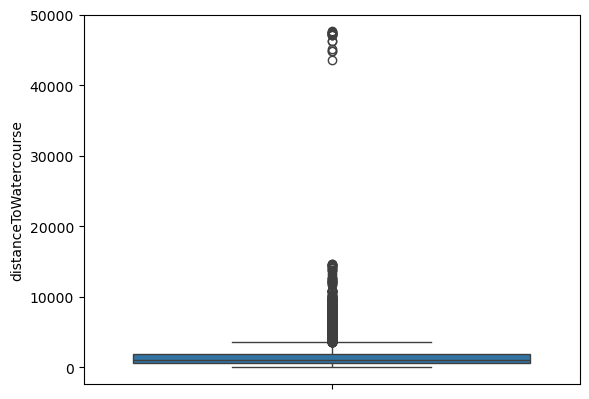

In [214]:
#postocodes_labelled.drop(columns=['easting', 'northing'], inplace=True)
postocodes_labelled.head()
#binning on median Price, 
#how to handle the imbalanced data: do we want to be cautious, or not. 
postocodes_labelled['historicallyFlooded'].value_counts() # Have the postcodes that have been flooded, 
sns.boxplot(postocodes_labelled['distanceToWatercourse'])

<Axes: xlabel='medianPrice'>

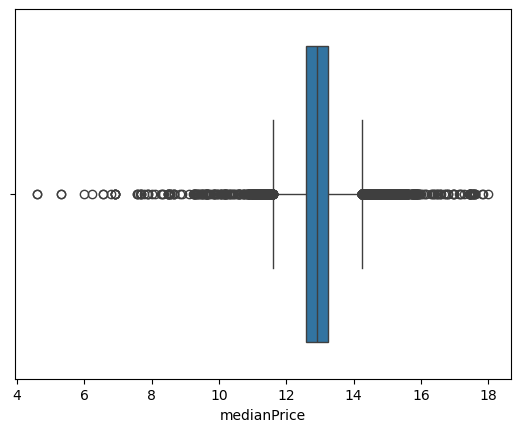

In [216]:
sns.boxplot(np.log(postocodes_labelled['medianPrice']), orient = 'h')

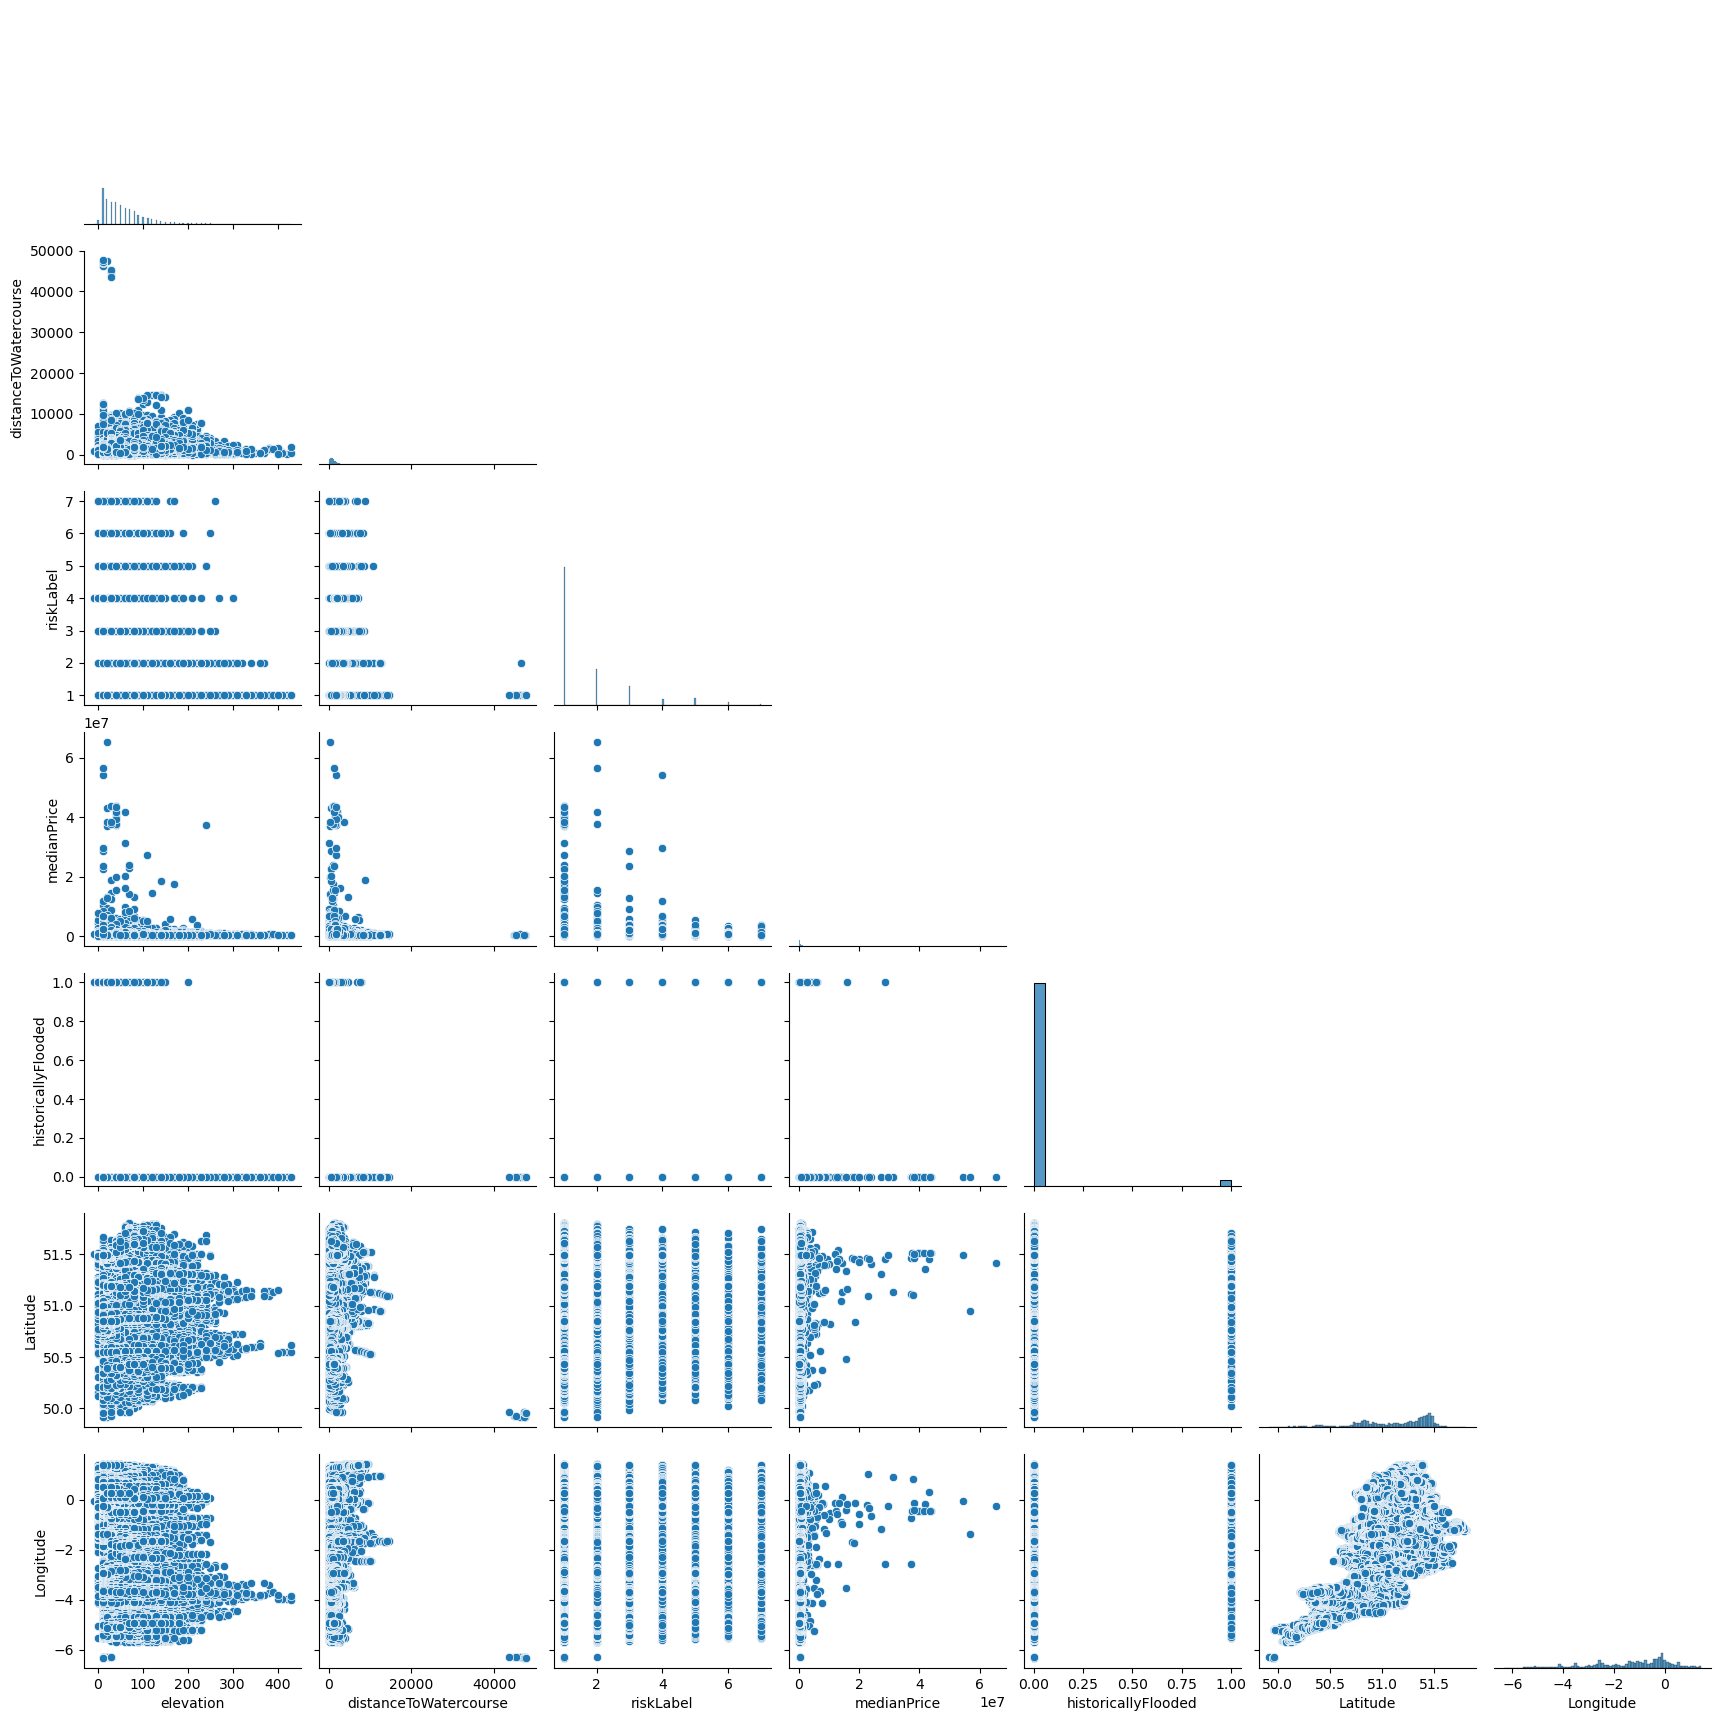

In [222]:
#sns.boxplot(postocodes_labelled['elevation'], orient = 'h')
sns.pairplot(postocodes_labelled, corner = 'True')

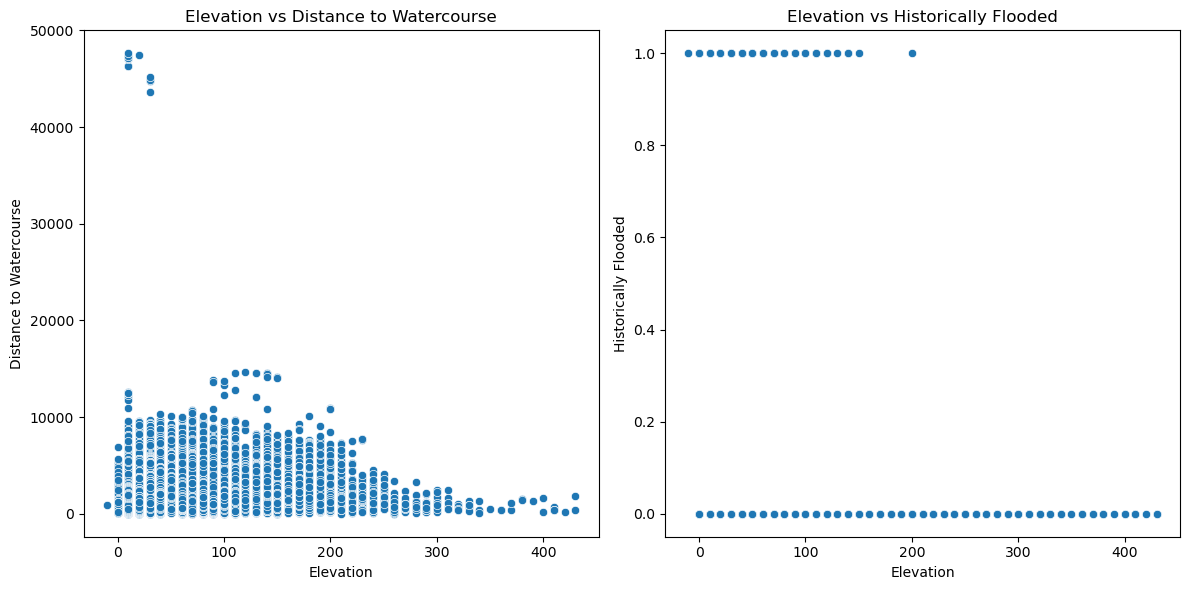

In [219]:
# Plot elevation vs distance to watercourse
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='elevation', y='distanceToWatercourse', data=postocodes_labelled)
plt.title('Elevation vs Distance to Watercourse')
plt.xlabel('Elevation')
plt.ylabel('Distance to Watercourse')

# Plot elevation vs historically flooded
plt.subplot(1, 2, 2)
sns.scatterplot(x='elevation', y='historicallyFlooded', data=postocodes_labelled)
plt.title('Elevation vs Historically Flooded')
plt.xlabel('Elevation')
plt.ylabel('Historically Flooded')

plt.tight_layout()
plt.show()

<Axes: >

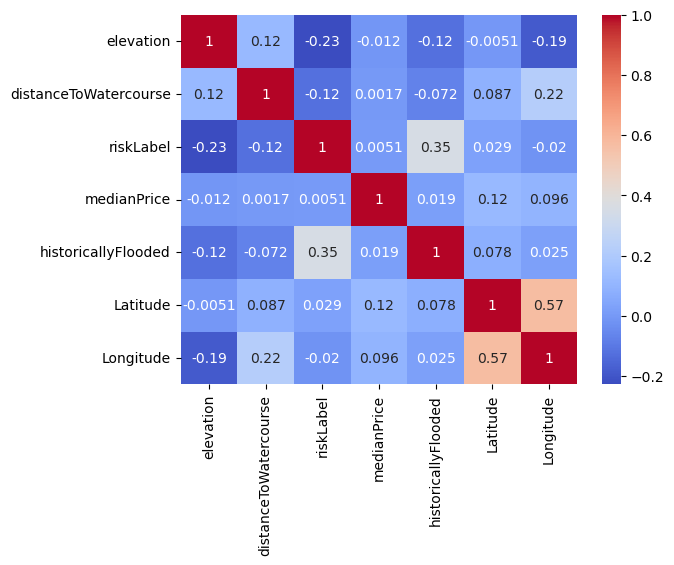

In [220]:
numerical_col = postocodes_labelled.select_dtypes(include=np.number)
sns.heatmap(numerical_col.corr(), annot=True, cmap='coolwarm')

In [ ]:
#binning house median price, bas 
#postocodes_labelled.drop(columns=['nearestWatercourse', 'localAuthority', 'postcode', 'riskLabel'], inplace=True)
#impute on missing house price the mean. 
#encode soil type
#Log transformation for elevation, distance to watercourse, median price
#Robust scaler on distance to watercourse and elevation


array(['Unsurveyed/Urban', 'Cambisols', 'Luvisols', 'Arenosols',
       'Leptosols', 'Stagnosols', 'Planosols', 'Gleysols', 'Histosols',
       'Podsols'], dtype=object)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Define preprocessing for numeric columns (impute missing values, log transform, and scale)
numeric_features = ['elevation', 'distanceToWatercourse', 'medianPrice']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', RobustScaler())
])

# Define preprocessing for categorical columns (one-hot encode)
categorical_features = ['soilType']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the pipeline
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the data into training and testing sets
X = postocodes_labelled.drop(columns=['riskLabel', 'postcode', 'nearestWatercourse', 'localAuthority'])
y = postocodes_labelled['riskLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

In [223]:
postocodes_labelled.head()

,postcode,soilType,elevation,nearestWatercourse,distanceToWatercourse,localAuthority,riskLabel,medianPrice,historicallyFlooded,Latitude,Longitude
0,BA1 1AL,Unsurveyed/Urban,20,River Avon,1240.0,Bath and North East Somerset,5,621800.0,1,51.379625,-2.363284
1,BA1 1AN,Unsurveyed/Urban,20,River Avon,1550.0,Bath and North East Somerset,3,577900.0,0,51.379000,-2.358926
2,BA1 1AR,Unsurveyed/Urban,20,River Avon,1540.0,Bath and North East Somerset,5,533300.0,1,51.378585,-2.359282
3,BA1 1BG,Unsurveyed/Urban,30,River Avon,1450.0,Bath and North East Somerset,1,563600.0,0,51.383215,-2.359763
4,BA1 1BH,Unsurveyed/Urban,30,River Avon,1410.0,Bath and North East Somerset,1,570800.0,0,51.382862,-2.360321


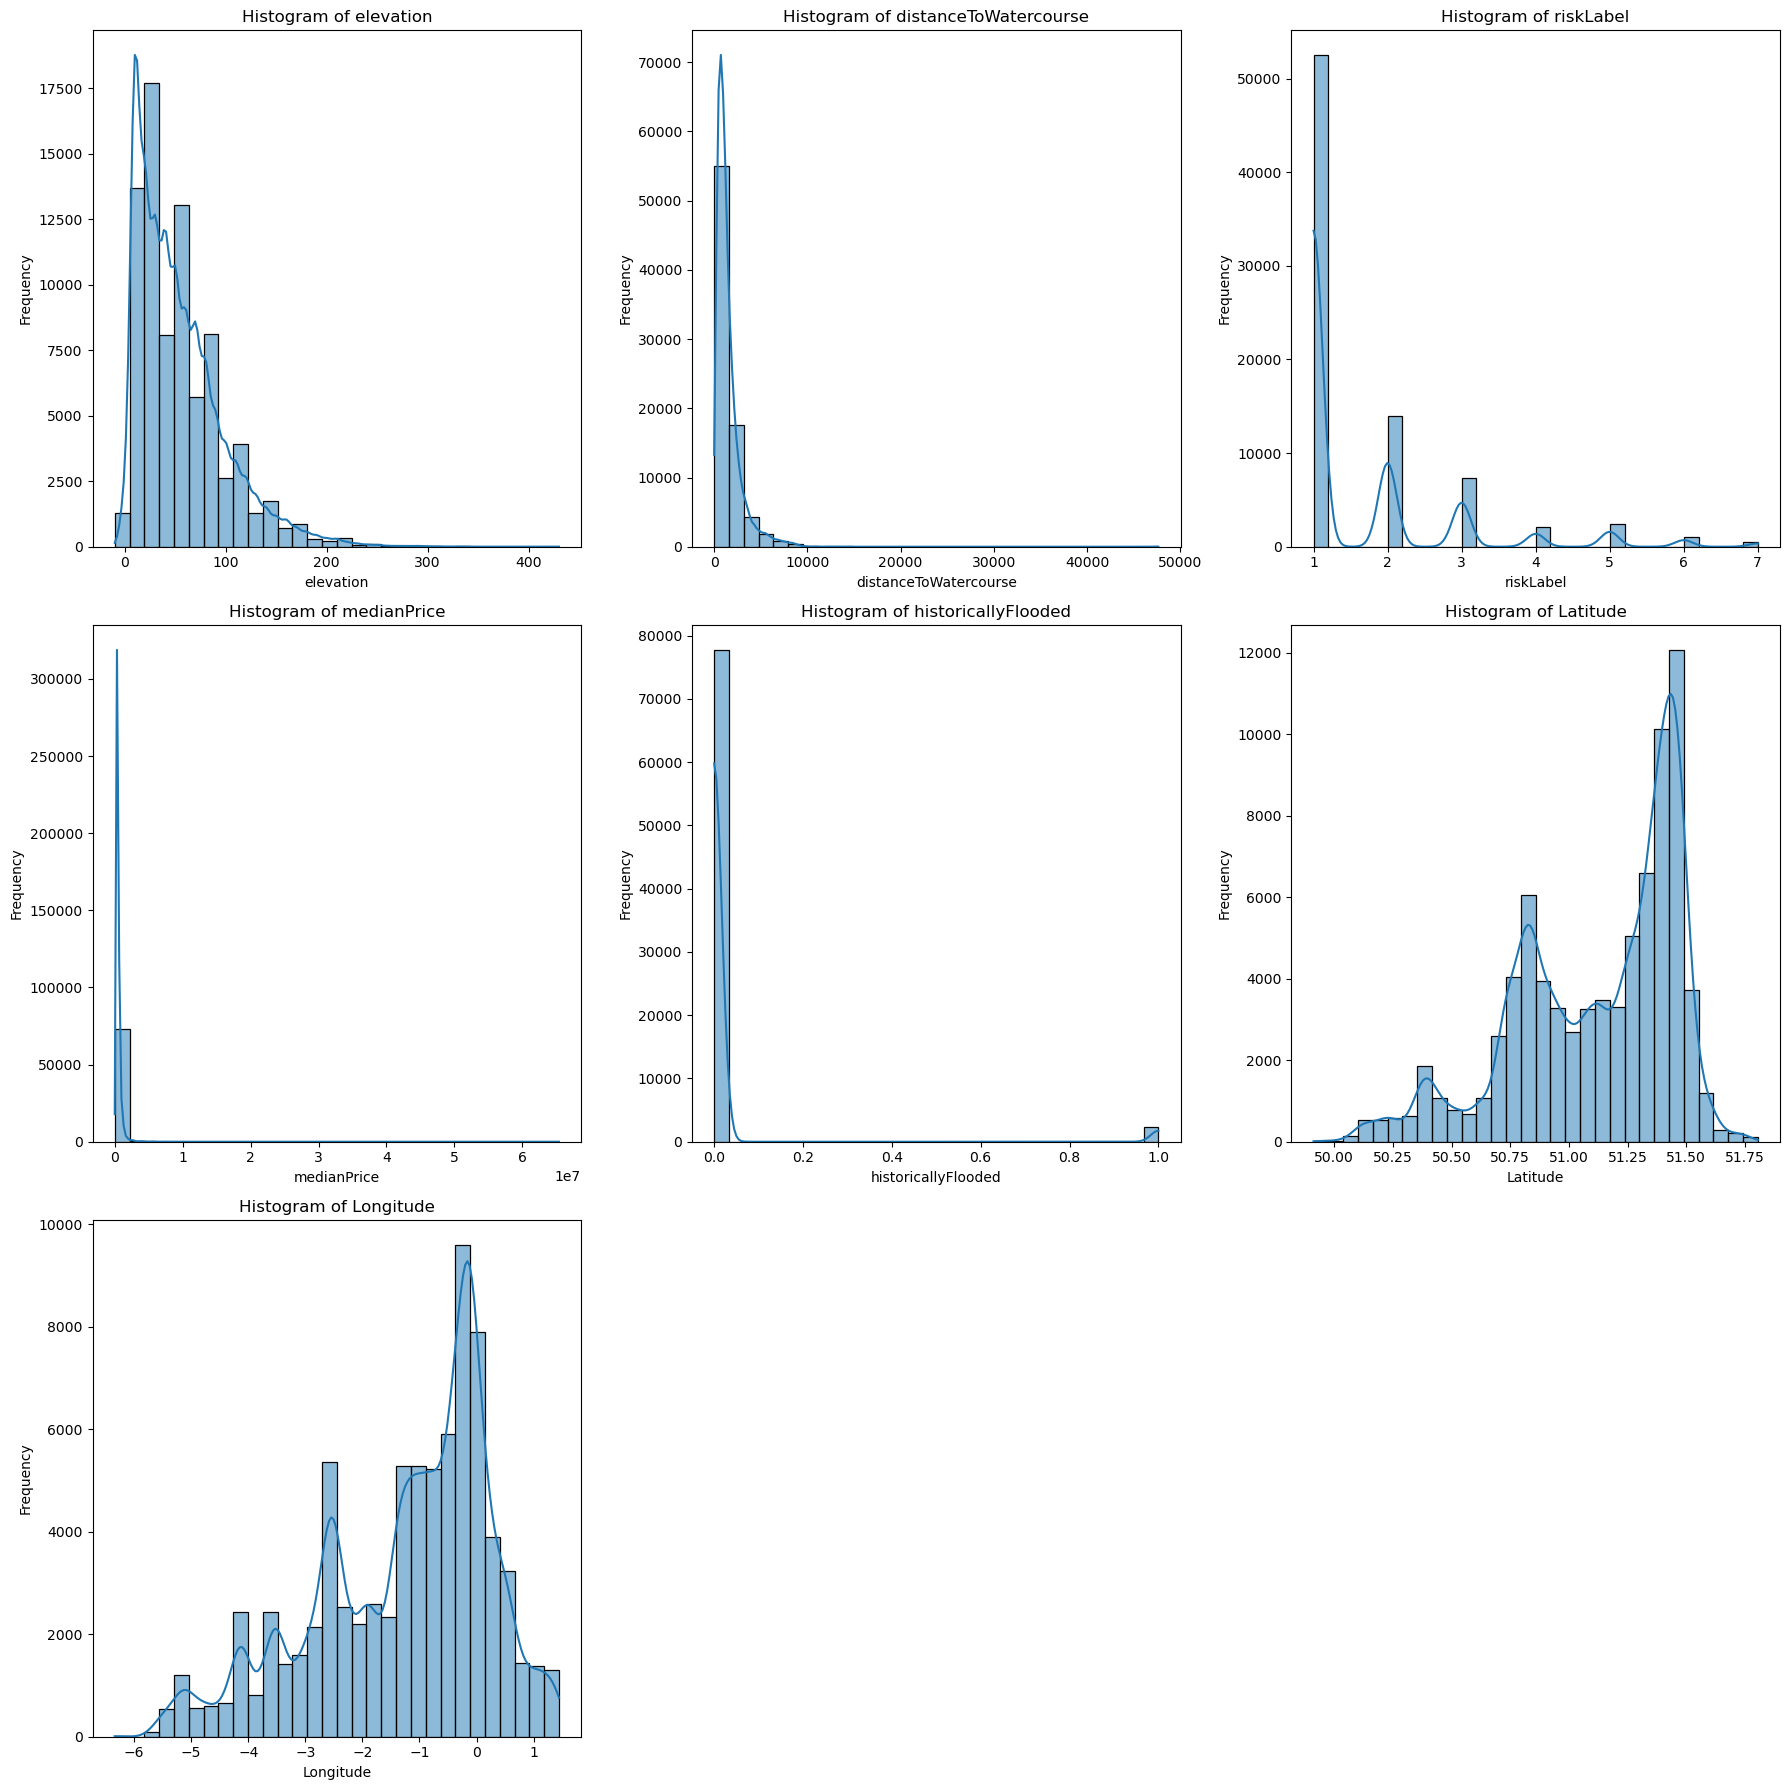

In [224]:
def plot_all_histograms(df, bins=30):
    """
    Plots a histogram for each numeric column in the DataFrame in a grid layout.
    
    Parameters:
    - df: pandas DataFrame with data.
    - bins: int, the number of bins for the histograms.
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    num_cols = len(numeric_cols)
    num_rows = (num_cols + 2) // 3  # Adjust the number of rows based on the number of columns

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col], bins=bins, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_all_histograms(postocodes_labelled)


#elevation, distacnetoWaterscourse skwewed: robust scaler
#